In [3]:
import network.layers as layers
import network.loss as loss
from nnfs.datasets import spiral_data
import network.optimizers as optimizers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from utils.visualize import visualize_model_decision_boundaries

In [4]:
X, y = spiral_data(samples=100, classes=3)

In [5]:
class Model():
    def __init__(self):        
        self.dense_1 = layers.Dense(2, 64)
        self.activation_1 = layers.Relu()
        self.dense_2 = layers.Dense(64, 3)
        self.activation_2 = layers.Softmax()

        self.loss_f = None
        
        self.optimizer = None

        self.metrics = []
    
    def forward(self, X, y):
        if len(y.shape) == 2:
            self.y = np.argmax(y, axis=1)
        else:
            self.y = y
        
        self.__forward_pass(X)
    
    def __forward_pass(self, X):
        self.dense_1.forward(X)
        self.activation_1.forward(self.dense_1.output)
        self.dense_2.forward(self.activation_1.output)
        self.activation_2.forward(self.dense_2.output)

    def calculate_loss(self):
        self.loss = self.loss_f.calculate(self.activation_2.output, self.y)
        return self.loss
    
    def calculate_metrics(self):
        self.metrics_dict = {}
        if 'accuracy' in self.metrics:
            predictions = np.argmax(self.activation_2.output, axis=1)
            accuracy = np.mean(predictions==self.y)
            self.metrics_dict['accuracy'] = float(accuracy)
        
        return self.metrics_dict
    
    def backward(self):
        self.loss_f.backward(self.activation_2.output, self.y)
        self.activation_2.backward(self.loss_f.d_inputs)
        self.dense_2.backward(self.activation_2.d_inputs)
        self.activation_1.backward(self.dense_2.d_inputs)
        self.dense_1.backward(self.activation_1.d_inputs)

        self.optimizer.update_weights(self.dense_2)
        self.optimizer.update_weights(self.dense_1)  
    
    def predict(self, X):
        self.__forward_pass(X)
        proba_ = self.activation_2.output
        classes = np.argmax(proba_, axis=1)
        return proba_, classes

In [6]:
model = Model()
model.optimizer = optimizers.SGD(lr=1.0)
model.loss_f = loss.CategoricalCrossEntropy()
model.metrics = ['accuracy']

In [7]:
orignal_weights = model.dense_1.weights.copy()

def plot_visuals(model, loss, accuracy, lr, save_path="visual.png"):
    fig = plt.figure(figsize=(16, 9))

    ax1 = plt.subplot2grid((16, 9), (0, 0), colspan=5, rowspan=15)  # Main image
    ax2 = plt.subplot2grid((32, 27), (1, 15), colspan=12, rowspan=2)   # Top right
    ax3 = plt.subplot2grid((32, 27), (2, 15), colspan=12, rowspan=2)   # Top right
    ax4 = plt.subplot2grid((32, 27), (4, 15), colspan=12, rowspan=2)   # Top right
    ax5 = plt.subplot2grid((32, 27), (5, 15), colspan=12, rowspan=2)   # Top right
    ax6 = plt.subplot2grid((32, 27), (8, 16), colspan=2, rowspan=20)   # Middle right
    ax7 = plt.subplot2grid((32, 27), (8, 17), colspan=2, rowspan=20)   # Middle right
    ax8 = plt.subplot2grid((40, 27), (36, 16), colspan=1, rowspan=1)   # Middle right
    ax9 = plt.subplot2grid((40, 27), (36, 17), colspan=1, rowspan=1)   # Middle right
    ax10 = plt.subplot2grid((16, 9), (4, 7), colspan=2, rowspan=3)  # Bottom right
    ax11 = plt.subplot2grid((16, 9), (8, 7), colspan=2, rowspan=3)  # Bottom right
    ax12 = plt.subplot2grid((16, 9), (12, 7), colspan=2, rowspan=3)  # Bottom right

    ax2.set_title("Dense 1 (Weights) - Values & Updates", fontsize=9)
    ax4.set_title("Dense 1 (Biases) - Values & Updates", fontsize=9)
    ax6.text(-0.15, 0.5, 
            "Dense 2 (Weights) - Values & Updates \n Bias details below \n", 
            fontsize=9, 
            verticalalignment='center', 
            horizontalalignment='right', 
            transform=ax6.transAxes, 
            rotation=90)
#     ax10.set_title(f"Loss | var: {np.var(loss)}", fontsize=9)
#     ax11.set_title(f"Accuracy | var: {np.var(accuracy)}", fontsize=9)
#     ax12.set_title("Learning Rate", fontsize=9)
    ax10.set_title(f"Loss", fontsize=9)
    ax11.set_title(f"Accuracy", fontsize=9)
    ax12.set_title("Learning Rate", fontsize=9)

    visualize_model_decision_boundaries(model, 
                                        X, 
                                        y, 
                                        ['red', 'green', 'blue'], 
                                        0.01, 
                                        title="Non-linear decision boundary with spiral data", 
                                        ax=ax1,
                                        alpha=0.65)

    sns.heatmap(model.dense_1.weights, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax2, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_1.d_weights, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax3, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_1.bias, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax4, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_1.d_biases, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax5, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_2.weights, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax6, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_2.d_weights, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax7, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_2.bias, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax8, 
                square=True, 
                cbar=False)

    sns.heatmap(model.dense_2.d_biases, 
                cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red']), 
                ax=ax9, 
                square=True, 
                cbar=False)

    ax10.plot(loss, color='brown')
    ax11.plot(accuracy, color='blue')
    ax12.plot(lr, color='green')

    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    ax6.axis('off')
    ax7.axis('off')
    ax8.axis('off')
    ax9.axis('off')
    ax10.xaxis.set_visible(False)
    ax11.xaxis.set_visible(False)

    plt.savefig(save_path)
    plt.close()

epoch: 0, acc: 0.38, loss: 1.1


KeyboardInterrupt: 

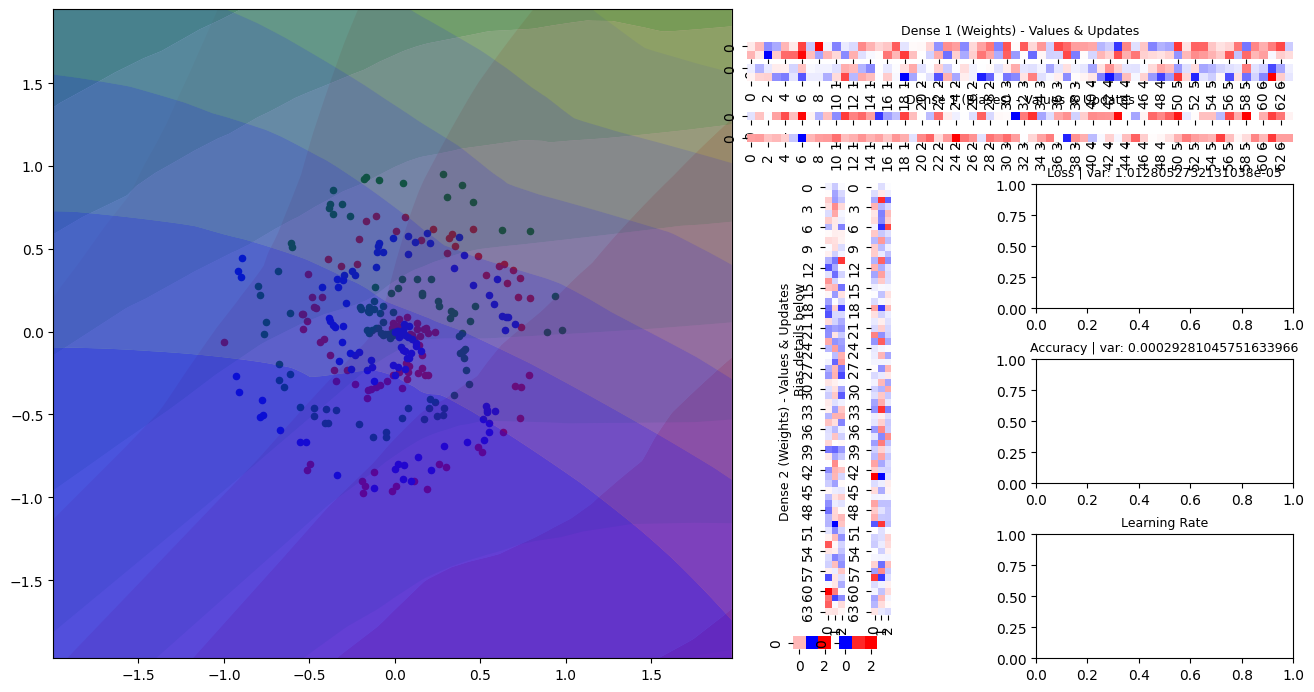

In [9]:
loss_arr = []
accuracy_arr = []
learning_rate_arr = []

for epoch in range(10001):
    model.forward(X, y)

    loss = model.calculate_loss()
    loss_arr.append(loss)

    metrics = model.calculate_metrics()
    accuracy_arr.append(metrics['accuracy'])

    if (epoch % 100) == 0:
        print(f"epoch: {epoch}, acc: {round(metrics['accuracy'], 2)}, loss: {round(loss, 2)}")
    
    learning_rate_arr.append(model.optimizer.learning_rate)

    model.backward()

    plot_visuals(model, loss_arr, accuracy_arr, learning_rate_arr, f"./media/SGD-2-64-3/visual{epoch}.png")